# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_study_df= pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")

# Display the data table for preview
merge_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
num_mice= len(merge_study_df["Mouse ID"].unique())
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_study_df[merge_study_df.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse= merge_study_df.loc[merge_study_df["Mouse ID"] == "g989", : ]
dup_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge_study_df= merge_study_df[merge_study_df["Mouse ID"] != "g989"]
clean_merge_study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
new_num_mice=len(clean_merge_study_df["Mouse ID"].unique())
new_num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean=clean_merge_study_df["Tumor Volume (mm3)"].groupby(clean_merge_study_df["Drug Regimen"]).mean()
tumor_median=clean_merge_study_df["Tumor Volume (mm3)"].groupby(clean_merge_study_df["Drug Regimen"]).median()
tumor_var=clean_merge_study_df["Tumor Volume (mm3)"].groupby(clean_merge_study_df["Drug Regimen"]).var()
tumor_std= clean_merge_study_df["Tumor Volume (mm3)"].groupby(clean_merge_study_df["Drug Regimen"]).std()
tumor_sem=clean_merge_study_df["Tumor Volume (mm3)"].groupby(clean_merge_study_df["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

sum_stat_df=pd.DataFrame({"Average Tumor Volume" : tumor_mean,
                          "Median of Tumor Volume": tumor_median,
                          "Variance of Tumor Volume" : tumor_var,
                          "Standard Deviation of Tumor Volume": tumor_std,
                          "SEM of Tumor Volume": tumor_sem})
sum_stat_df

,Average Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

agg = clean_merge_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
drug= clean_merge_study_df["Drug Regimen"].unique()
drug
timepoints=clean_merge_study_df.groupby(["Drug Regimen"])["Timepoint"].count()
timepoints

drug_time_df=clean_merge_study_df.groupby(["Drug Regimen"])["Timepoint"].count()
drug_time_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

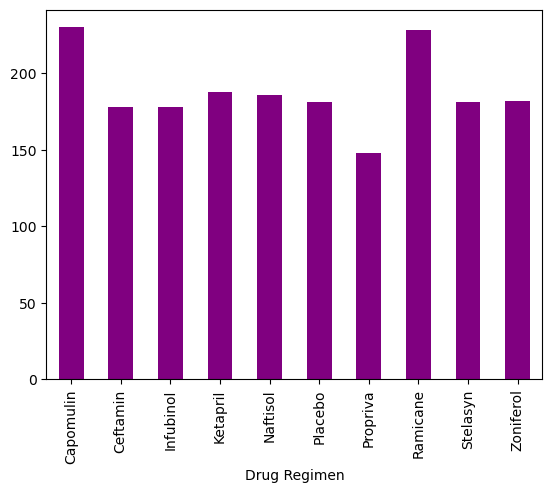

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_time_df.plot(kind="bar", color='purple')
plt.show()


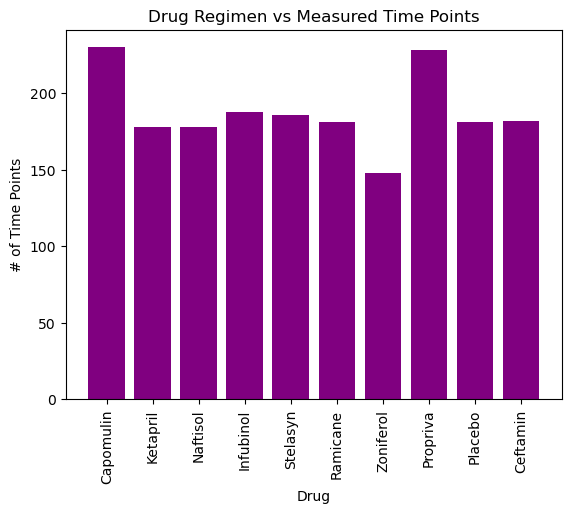

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug, timepoints, color="purple")
plt.title("Drug Regimen vs Measured Time Points")
plt.xlabel("Drug")
plt.ylabel("# of Time Points")
plt.xticks(rotation = 'vertical')
plt.show()

In [12]:
sex_df= clean_merge_study_df.groupby(["Sex"])["Mouse ID"].count()
sex_df
sex_labels = ["Female", "Male"]
colors = ["pink", "blue"]

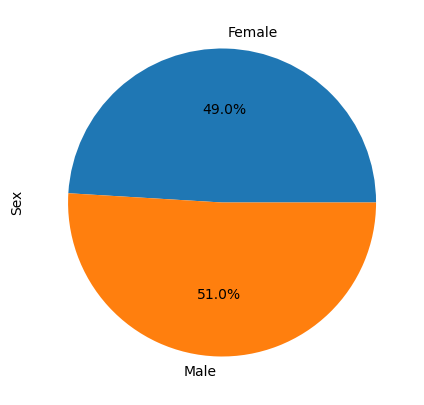

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df.plot.pie(ylabel="Sex", figsize=(5, 5), autopct="%1.1f%%")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

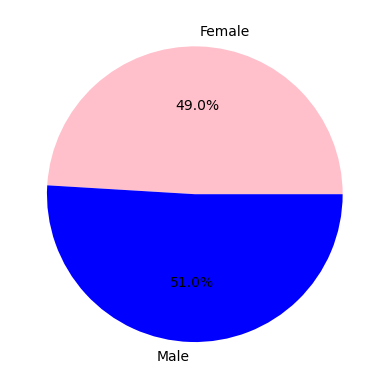

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df, labels=sex_labels, colors=colors, autopct="%1.1f%%")
plt.show

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_merge_study_df.loc[clean_merge_study_df['Drug Regimen'] == 'Capomulin',:]
ramicane_df= clean_merge_study_df.loc[clean_merge_study_df["Drug Regimen"] == "Ramicane", :]
infubinol_df= clean_merge_study_df.loc[clean_merge_study_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df= clean_merge_study_df.loc[clean_merge_study_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
great_cap = pd.DataFrame(capomulin_df.groupby("Mouse ID")["Timepoint"].max())
great_ram = pd.DataFrame(ramicane_df.groupby("Mouse ID")["Timepoint"].max())
great_inf = pd.DataFrame(infubinol_df.groupby("Mouse ID")["Timepoint"].max())
great_cef = pd.DataFrame(ceftamin_df.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cap_merge=pd.merge(great_cap, clean_merge_study_df, on=["Mouse ID", "Timepoint"])
ram_merge= pd.merge(great_ram, clean_merge_study_df, on=["Mouse ID", "Timepoint"])
inf_merge=pd.merge(great_inf,clean_merge_study_df, on=["Mouse ID", "Timepoint"])
cef_merge= pd.merge(great_cef,clean_merge_study_df, on=["Mouse ID", "Timepoint"])

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = [ ]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# cap_quartiles = cap_merge.quantile([.25,.5,.75])
# cap_quartiles
# lowerq_cap=cap_quartiles.loc[.25]
# lowerq_cap
# upperq_cap=cap_quartiles[.75]
# cap_iqr= upperq_cap-lowerq_cap
# cap_lbound= lowerq_cap - (1.5*cap_iqr)
# cap_ubound= upperq_cap + (1.5 * cap_iqr)

# ram_quartiles = ram_merge.quantile([.25,.5,.75])
# lowerq_ram=ram_quartiles[.25]
# upperq_ram= ram_quartiles[.75]
# ram_iqr= upperq_ram-lowerq_ram
# ram_lbound=lowerq_ram - (1.5 * ram_iqr)
# ram_ubound= upperq_ram + (1.5 * ram_iqr)

# inf_quartiles = inf_merge.quantile([.25,.5,.75])
# lowerq_inf= inf_quartiles[.25]
# upperq_inf= inf_quartiles[.75]
# inf_iqr= upperq_inf-lowerq_inf
# inf_lbound= lowerq_inf - (1.5 * inf_iqr)
# inf_ubound= upperq_inf + (1.5 * inf_iqr)

# cef_quartiles = cef_merge.quantile([.25,.5,.75])
# lowerq_cef= cef_quartiles[.25]
# upperq_cef= cef_quartiles[.75]
# cef_iqr= upperq_cef-lowerq_cef
# cef_lbound= lowerq_cef - (1.5 * cef_iqr)
# cef_ubound= upperq_cef + (1.5 * cef_iqr)

for treatment in treatments:
    drug_treat= clean_merge_study_df.loc[clean_merge_study_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_list.append(drug_treat)
    drug_quant= drug_treat.quantile([.25,.50,.75])
    lowerq= drug_quant[.25]
    upperq=drug_quant[.75]
    iqr=upperq-lowerq
    lbound= lowerq - (1.5 * iqr)
    ubound = upperq + (1.5 * iqr)
    outlier= drug_treat.loc[(drug_treat < lbound) | (drug_treat > ubound)]
    print(treatment,outlier)
    tumor_vol_list.clear()

    # Determine outliers using upper and lower bounds


Capomulin 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


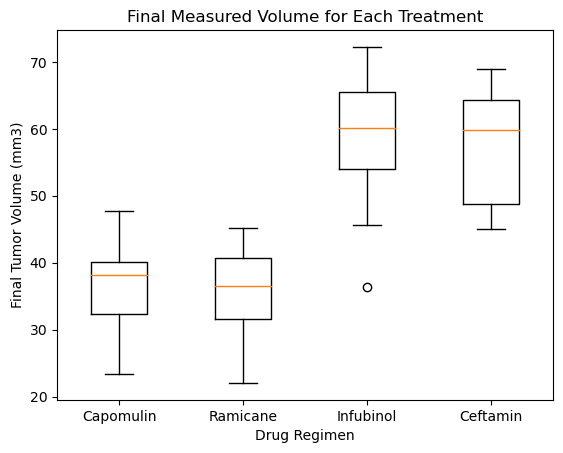

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxdata = [cap_merge["Tumor Volume (mm3)"], ram_merge["Tumor Volume (mm3)"], inf_merge["Tumor Volume (mm3)"], cef_merge["Tumor Volume (mm3)"]]
fig, ax = plt.subplots()
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Final Measured Volume for Each Treatment")
ax.boxplot(boxdata, labels= treatments)
plt.show()


## Line and Scatter Plots

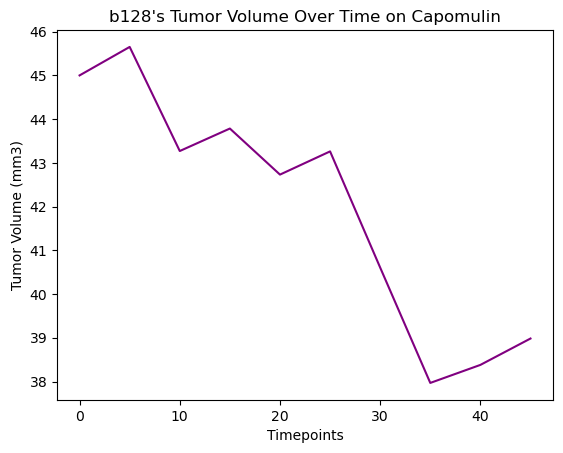

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128=capomulin_df.loc[capomulin_df["Mouse ID"] == "b128", :]
b128, = plt.plot(b128["Timepoint"], b128["Tumor Volume (mm3)"], color="purple")
plt.title("b128's Tumor Volume Over Time on Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

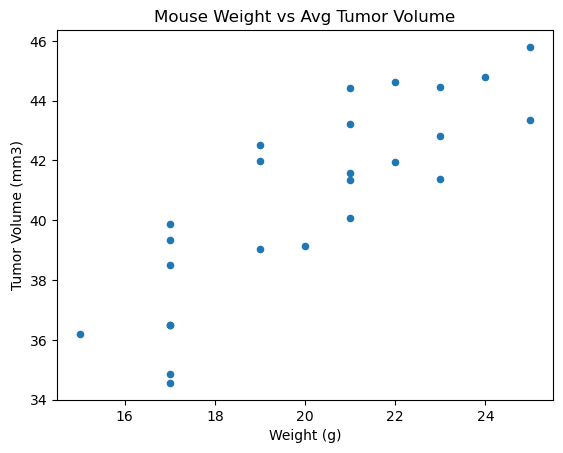

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mean_cap=capomulin_df.groupby("Mouse ID").mean(numeric_only= True)

mean_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title= "Mouse Weight vs Avg Tumor Volume")
plt.show()

## Correlation and Regression

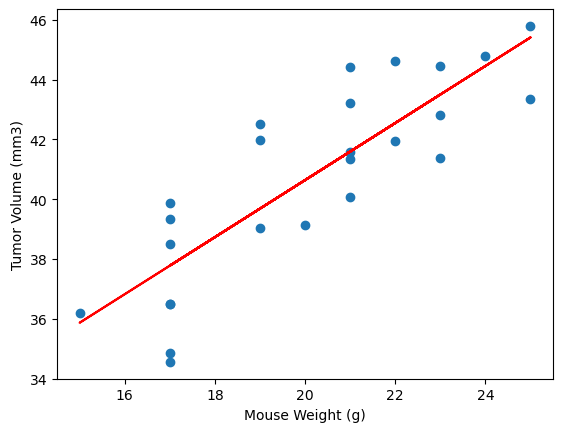

y = 0.95x + 21.55
The correlation coefficient between mouse weight and average tumor volume is 0.84


In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouseweight=mean_cap["Weight (g)"]
tumor_vol_cap=mean_cap["Tumor Volume (mm3)"]
plt.scatter(mouseweight, tumor_vol_cap)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseweight, tumor_vol_cap)
regress_values = mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(mouseweight,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")


plt.show()
print(line_eq)
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouseweight,tumor_vol_cap)[0],2)}")